In [1]:
#inisiasi library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [3]:
#cek dataset
bike_hour_df = pd.read_csv("hour.csv")
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bike_day_df = pd.read_csv("day.csv")
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# cek tipe data DF
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# cek duplicates
print("Jumlah duplikasi: ",bike_hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
print("Jumlah missing value: ", bike_hour_df.isna().sum())
bike_hour_df.describe()

Jumlah missing value:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
# mengubah tipe data dteday di hour
datetime_columns = ["dteday"]

for column in datetime_columns:
    bike_hour_df[column] = pd.to_datetime(bike_hour_df[column])

In [9]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [10]:
'''
###############################################################################################################################
'''

'\n###############################################################################################################################\n'

In [11]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
# cek duplikasi
print("Jumlah duplikasi: ",bike_day_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
print("Jumlah missing value: ",bike_day_df.isna().sum())
bike_day_df.describe()

Jumlah missing value:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
# mengubah tipe data dteday
datetime_columns = ["dteday"]

for column in datetime_columns:
    bike_day_df[column] = pd.to_datetime(bike_day_df[column])

In [15]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
# PERTANYAAN
# 1. bulan peminjaman terbaik dan terburuk
# 2. Bagaimana perbandingan registered dan casual pada working day

In [17]:
# JAWAB PERTANYAAN
# '''
# BATAS CLEANING
# '''

In [18]:
# EXPLORATORY DATA
# Melihat rent per bulan seluruh dataset
bike_day_df.groupby(["mnth", "yr"]).agg({
    "cnt": ["max", "min", "mean", "std", "sum"],
})

cnt                                        
          max   min         mean          std     sum
mnth yr                                              
1    0   1985   431  1231.903226   372.432665   38189
     1   4521  1301  3120.774194   872.852134   96744
2    0   2927  1005  1721.964286   398.508839   48215
     1   5062  1529  3556.448276   870.724640  103137
3    0   3239   605  2065.967742   550.971716   64045
     1   8362  3194  5318.548387  1251.162682  164875
4    0   5312   795  3162.333333  1042.093593   94870
     1   7460  1027  5807.466667  1308.938916  174224
5    0   5805  2633  4381.322581   572.927883  135821
     1   8294  2843  6318.225806  1078.403997  195865
6    0   5515  3767  4783.733333   444.447812  143512
     1   8120  4127  6761.000000   954.204995  202830
7    0   6043  3285  4559.387097   680.090762  141341
     1   8173  4459  6567.967742   867.183736  203607
8    0   5895  1115  4409.387097   809.852401  136691
     1   7865  4549  6919.451613   794.059017  214503
9    0   5423  1842  4247.266667   965.377251  127418
     1   8714  4073  7285.766667   979.160925  218573
10   0   5511   627  3984.225806  1103.481844  123511
     1   8156    22  6414.225806  1941.819400  198841
11   0   4486  1495  3405.566667   788.249290  102167
     1   6852  2277  5088.800000  1129.731198  152664
12   0   3940   705  2816.870968   958.763187   87323
     1   6606   441  3990.741935  1803.227864  123713

In [19]:
# melihat per bulan yang registered
bike_day_df.groupby(["mnth","yr"]).agg({
    "registered": ["max", "min", "mean", "std", "sum"],
})

registered                                        
               max   min         mean          std     sum
mnth yr                                                   
1    0        1844   416  1132.774194   370.027540   35116
     1        4185  1234  2831.451613   792.457689   87775
2    0        2348   905  1499.035714   331.779990   41973
     1        4546  1456  3255.724138   839.594200   94416
3    0        2355   491  1652.225806   402.395387   51219
     1        5893  2339  4298.612903   935.885487  133257
4    0        3722   674  2417.466667   809.575143   72524
     1        5950   907  4525.600000  1056.822551  135768
5    0        4238  2213  3379.709677   566.067911  104771
     1        6433  2501  4891.290323   963.828761  151630
6    0        4488  2993  3763.333333   439.945869  112900
     1        6456  3594  5317.866667   802.526817  159536
7    0        4220  2298  3383.516129   509.528074  104889
     1        6790  3195  5222.645161   935.328447  161902
8    0        4614   889  3479.000000   755.445608  107849
     1        6541  3341  5526.000000   942.817833  171306
9    0        4372  1689  3362.433333   773.177576  100873
     1        6946  3197  5826.500000  1065.437089  174795
10   0        4267   570  3170.612903   810.102655   98289
     1        6911    20  5300.096774  1665.547865  164303
11   0        3891   935  2885.766667   788.097915   86573
     1        5520  1470  4388.500000  1112.181539  131655
12   0        3672   451  2544.354839   947.709082   78875
     1        6055   432  3563.483871  1711.587409  110468

In [20]:
# melihat per bulan yang casual
bike_day_df.groupby(["mnth","yr"]).agg({
    "casual": ["max", "min", "mean", "std", "sum"]
})

casual                                     
           max  min         mean         std    sum
mnth yr                                            
1    0     331    9    99.129032   72.503215   3073
     1    1070   67   289.322581  235.103295   8969
2    0     694   47   222.928571  193.234827   6242
     1    1435   65   300.724138  262.347084   8721
3    0    1424   46   413.741935  332.841501  12826
     1    3155  203  1019.935484  701.334392  31618
4    0    1965  121   744.866667  497.720787  22346
     1    3252  120  1281.866667  843.933922  38456
5    0    2355  255  1001.612903  525.722530  31050
     1    3410  342  1426.935484  888.284562  44235
6    0    1920  513  1020.400000  458.669861  30612
     1    2963  477  1443.133333  770.864527  43294
7    0    3065  562  1175.870968  665.455420  36452
     1    2562  747  1345.322581  519.993166  41705
8    0    1914  226   930.387097  359.765449  28842
     1    2827  935  1393.451613  449.915462  43197
9    0    2521  118   884.833333  599.444173  26545
     1    3160  371  1459.266667  761.049273  43778
10   0    2397   57   813.612903  617.780796  25222
     1    3031    2  1114.129032  759.714540  34538
11   0    1275   69   519.800000  374.552091  15594
     1    2290  123   700.300000  542.275166  21009
12   0     706   50   272.516129  168.638048   8448
     1    1153    9   427.258065  244.896028  13245

In [21]:
# Melihat rental saat weather tertentu
bike_day_df.groupby(by="weathersit").agg({
    "cnt" : ["min","max"]
})

cnt      
            min   max
weathersit           
1           431  8714
2           605  8362
3            22  4639

In [22]:
# melihat peminjaman berdasarkan workingday
bike_day_df.groupby(by="workingday").agg({
    "cnt" : ["min", "max", "mean", "sum"],
    "casual" : ["min", "max", "mean", "sum"],
    "registered" : ["min", "max", "mean", "sum"]
})

cnt                             casual                             \
            min   max         mean      sum    min   max         mean     sum   
workingday                                                                      
0           605  8714  4330.168831  1000269     54  3410  1371.134199  316732   
1            22  8362  4584.820000  2292410      2  2469   606.570000  303285   

           registered                              
                  min   max         mean      sum  
workingday                                         
0                 451  5966  2959.034632   683537  
1                  20  6946  3978.250000  1989125

In [23]:
# melihat peminjaman berdasarkan weathersit
bike_day_df.groupby(by="weathersit").agg({
    "cnt" : ["min", "max", "mean", "sum"],
    "casual" : ["min", "max", "mean", "sum"],
    "registered" : ["min", "max", "mean", "sum"]
})

cnt                             casual                            \
            min   max         mean      sum    min   max        mean     sum   
weathersit                                                                     
1           431  8714  4876.786177  2257952     15  3410  964.030238  446346   
2           605  8362  4035.862348   996858      9  3155  687.352227  169776   
3            22  4639  1803.285714    37869      2  1264  185.476190    3895   

           registered                              
                  min   max         mean      sum  
weathersit                                         
1                 416  6946  3912.755940  1811606  
2                 491  6844  3348.510121   827082  
3                  20  4324  1617.809524    33974

In [24]:
# melihat peminjaman berdasarkan jam
bike_hour_df.groupby(by="hr").agg({
    "cnt" : ["min", "max", "mean", "sum"],
    "casual" : ["min", "max", "mean", "sum"],
    "registered" : ["min", "max", "mean", "sum"]
})

cnt                          casual                        registered       \
   min  max        mean     sum    min  max       mean    sum        min  max   
hr                                                                              
0    2  283   53.898072   39130      0   68  10.158402   7375          0  234   
1    1  168   33.375691   24164      0   49   6.504144   4709          0  139   
2    1  132   22.869930   16352      0   44   4.772028   3412          0  104   
3    1   79   11.727403    8174      0   26   2.715925   1893          0   61   
4    1   28    6.352941    4428      0   13   1.253945    874          0   22   
5    1   66   19.889819   14261      0   16   1.411437   1012          0   64   
6    1  213   76.044138   55132      0   19   4.161379   3017          0  203   
7    1  596  212.064649  154171      0   40  11.055021   8037          1  572   
8    5  839  359.011004  261001      0   69  21.679505  15761          4  808   
9   14  426  219.309491  159438      0  142  30.891334  22458          6  399   
10   8  539  173.668501  126257      0  209  46.477304  33789          8  351   
11  10  663  208.143054  151320      0  268  59.540578  43286          5  446   
12   3  776  253.315934  184414      0  362  68.293956  49718          3  526   
13  11  760  253.661180  184919      0  355  72.308642  52713          9  491   
14  12  750  240.949246  175652      0  361  75.567901  55089         12  502   
15   7  750  251.233196  183149      0  357  74.905350  54606          4  456   
16  11  783  311.983562  227748      0  367  73.745205  53834          8  481   
17  15  976  461.452055  336860      0  347  74.273973  54220         14  885   
18  23  977  425.510989  309772      0  266  61.120879  44496         20  886   
19  11  743  311.523352  226789      0  230  48.770604  35505         11  662   
20  11  567  226.030220  164550      0  237  36.233516  26378          8  461   
21   6  584  172.314560  125445      0  222  28.255495  20570          6  362   
22   9  502  131.335165   95612      0  175  22.252747  16200          5  327   
23   2  256   87.831044   63941      0   71  15.199176  11065          2  220   

                        
          mean     sum  
hr                      
0    43.739669   31755  
1    26.871547   19455  
2    18.097902   12940  
3     9.011478    6281  
4     5.098996    3554  
5    18.478382   13249  
6    71.882759   52115  
7   201.009629  146134  
8   337.331499  245240  
9   188.418157  136980  
10  127.191197   92468  
11  148.602476  108034  
12  185.021978  134696  
13  181.352538  132206  
14  165.381344  120563  
15  176.327846  128543  
16  238.238356  173914  
17  387.178082  282640  
18  364.390110  265276  
19  262.752747  191284  
20  189.796703  138172  
21  144.059066  104875  
22  109.082418   79412  
23   72.631868   52876

In [25]:

# cnt data by month viz best and worst

data_peminjam_berdasarkan_bulan = bike_day_df.groupby(['mnth','yr']).agg({'cnt': 'sum'}).reset_index()

In [26]:
# data sortir dari df di atas
data_peminjam_berdasarkan_bulan.head(5)

,mnth,yr,cnt
0,1,0,38189
1,1,1,96744
2,2,0,48215
3,2,1,103137
4,3,0,64045


In [27]:
import calendar
data_peminjam_berdasarkan_bulan.month = pd.Categorical(bike_day_df.mnth, categories=list(calendar.month_abbr)[1:], ordered=True)
data_peminjam_berdasarkan_bulan.head(12)

C:\Users\Niki\AppData\Local\Temp\ipykernel_1236\2708981706.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_peminjam_berdasarkan_bulan.month = pd.Categorical(bike_day_df.mnth, categories=list(calendar.month_abbr)[1:], ordered=True)


,mnth,yr,cnt
0,1,0,38189
1,1,1,96744
2,2,0,48215
3,2,1,103137
4,3,0,64045
5,3,1,164875
6,4,0,94870
7,4,1,174224
8,5,0,135821
9,5,1,195865


In [28]:
data_peminjam_tahun1 = data_peminjam_berdasarkan_bulan[data_peminjam_berdasarkan_bulan.yr == 0]
data_peminjam_tahun1.head(12)

,mnth,yr,cnt
0,1,0,38189
2,2,0,48215
4,3,0,64045
6,4,0,94870
8,5,0,135821
10,6,0,143512
12,7,0,141341
14,8,0,136691
16,9,0,127418
18,10,0,123511


In [29]:
data_peminjam_tahun2 = data_peminjam_berdasarkan_bulan[data_peminjam_berdasarkan_bulan.yr ==1]
data_peminjam_tahun2.head(12)

,mnth,yr,cnt
1,1,1,96744
3,2,1,103137
5,3,1,164875
7,4,1,174224
9,5,1,195865
11,6,1,202830
13,7,1,203607
15,8,1,214503
17,9,1,218573
19,10,1,198841


C:\Users\Niki\AppData\Local\Temp\ipykernel_1236\828618080.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="mnth", data=data_peminjam_tahun1.head(5), palette=colors, ax=ax[0])
C:\Users\Niki\AppData\Local\Temp\ipykernel_1236\828618080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="mnth", data=data_peminjam_tahun1.sort_values(by="cnt", ascending=True).head(5), palette=colors,ax=ax[1])


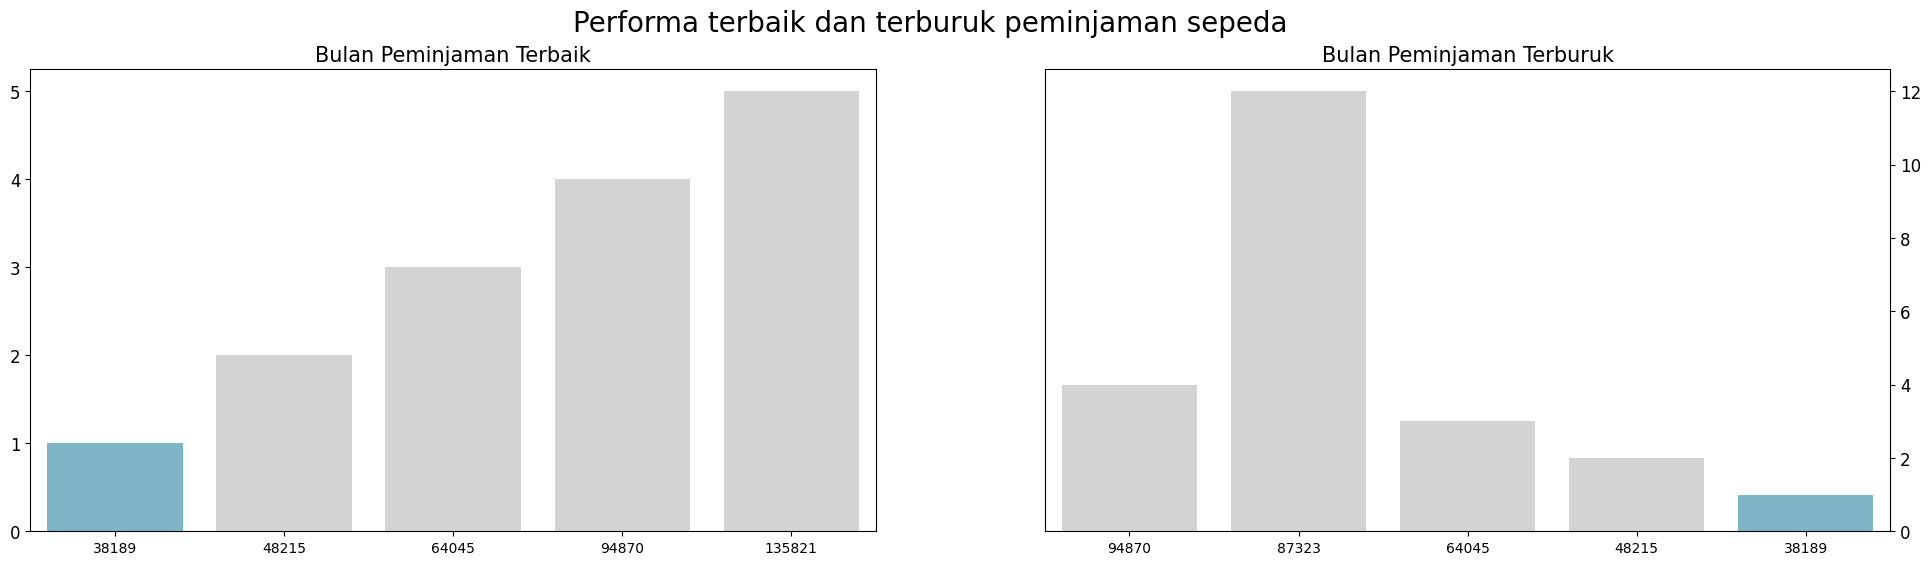

In [30]:
# figure 2
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="cnt", y="mnth", data=data_peminjam_tahun1.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Bulan Peminjaman Terbaik", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="cnt", y="mnth", data=data_peminjam_tahun1.sort_values(by="cnt", ascending=True).head(5), palette=colors,ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Bulan Peminjaman Terburuk", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Performa terbaik dan terburuk peminjaman sepeda", fontsize=20)
plt.show()

In [31]:
dfg = bike_day_df.groupby(["mnth", "yr"]).agg({'registered': 'sum', 'casual': 'sum', 'cnt': 'sum'}).reset_index()

dfg.head()

,mnth,yr,registered,casual,cnt
0,1,0,35116,3073,38189
1,1,1,87775,8969,96744
2,2,0,41973,6242,48215
3,2,1,94416,8721,103137
4,3,0,51219,12826,64045


In [32]:
# import calendar
dfg.month = pd.Categorical(bike_day_df.mnth, categories=list(calendar.month_abbr)[1:], ordered=True)
dfg.head(5)

C:\Users\Niki\AppData\Local\Temp\ipykernel_1236\711672138.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfg.month = pd.Categorical(bike_day_df.mnth, categories=list(calendar.month_abbr)[1:], ordered=True)


,mnth,yr,registered,casual,cnt
0,1,0,35116,3073,38189
1,1,1,87775,8969,96744
2,2,0,41973,6242,48215
3,2,1,94416,8721,103137
4,3,0,51219,12826,64045


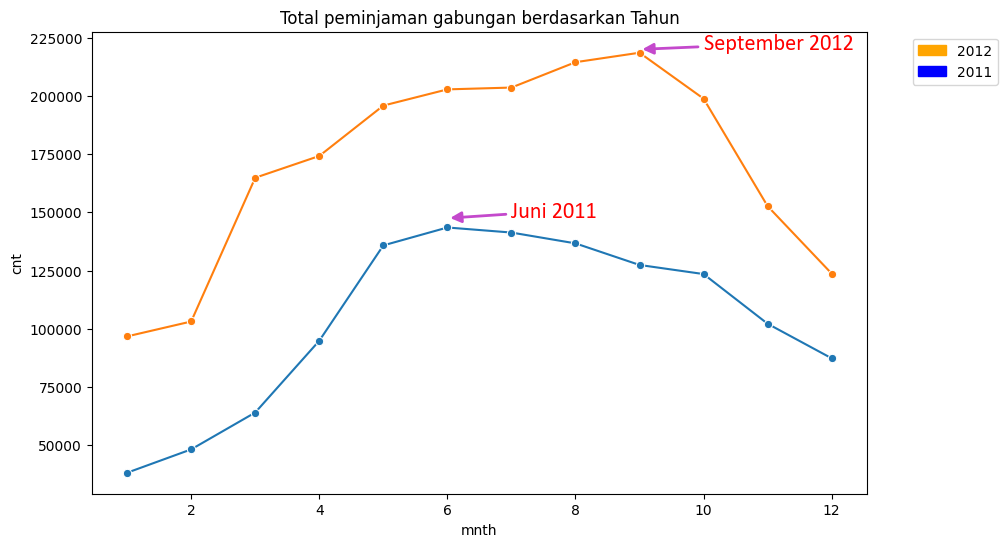

In [33]:
#viz line chart total peminjam gabungan di berdasarkan bulan
plt.figure(figsize=(10, 6)) 
plt.title("Total peminjaman gabungan berdasarkan Tahun")
sns.lineplot(x='mnth', y='cnt', data=dfg, hue='yr', marker="o") 
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
#max value
hfont = {'fontname':'Calibri'} # main font
ann_color = '#c449cc' # annotation color
arrowprops=dict(arrowstyle='-|>', color=ann_color, linewidth=2)
plt.annotate('September 2012', 
            xy=(9, 220000), # arrow position (x, y)
            xytext=(10, 220000), # text position (x, y)
            color='red',
            arrowprops=arrowprops,
            fontsize=16,
           **hfont)
plt.annotate('Juni 2011', 
            xy=(6, 147500), # arrow position (x, y)
            xytext=(7, 148000), # text position (x, y)
            color='red',
            arrowprops=arrowprops,
            fontsize=16,
           **hfont)
orange_patch = mpatches.Patch(color='orange', label='2012')
blue_patch = mpatches.Patch(color='blue', label='2011')
plt.legend(handles=[orange_patch, blue_patch], loc="upper left", bbox_to_anchor=(1.05, 1))
plt.xticks() 
plt.show()

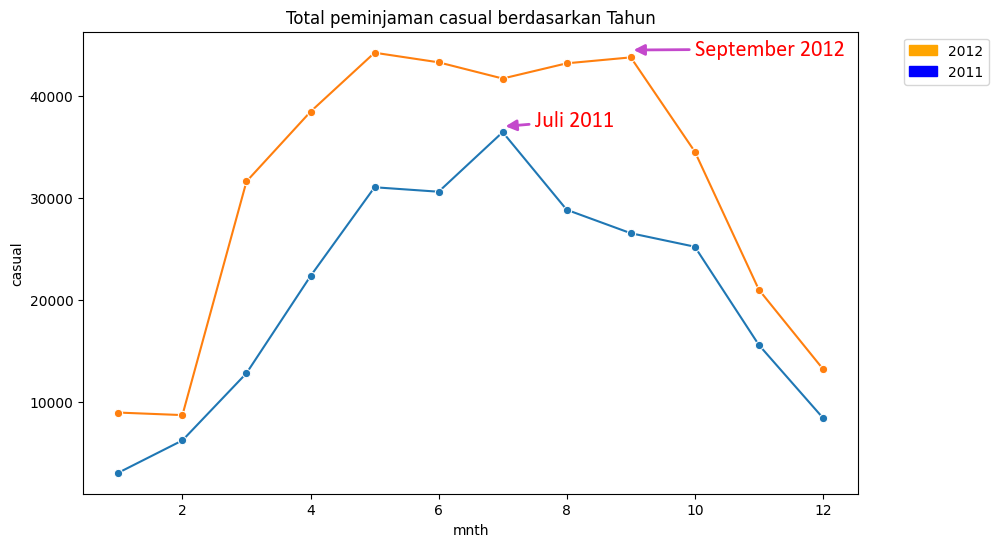

In [34]:
# viz line chart total peminjam kasual di berdasarkan Tahun
plt.figure(figsize=(10, 6)) 
plt.title("Total peminjaman casual berdasarkan Tahun")
sns.lineplot(x='mnth', y='casual', data=dfg, hue='yr', marker="o") 
#max value
hfont = {'fontname':'Calibri'} # main font
ann_color = '#c449cc' # annotation color
arrowprops=dict(arrowstyle='-|>', color=ann_color, linewidth=2)
plt.annotate('September 2012', 
            xy=(9, 44500), # arrow position (x, y)
            xytext=(10, 44000), # text position (x, y)
            color='red',
            arrowprops=arrowprops,
            fontsize=16,
           **hfont)

plt.annotate('Juli 2011', 
            xy=(7, 37000), # arrow position (x, y)
            xytext=(7.5, 37000), # text position (x, y)
            color='red',
            arrowprops=arrowprops,
            fontsize=16,
           **hfont)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
orange_patch = mpatches.Patch(color='orange', label='2012')
blue_patch = mpatches.Patch(color='blue', label='2011')
plt.legend(handles=[orange_patch, blue_patch], loc="upper left", bbox_to_anchor=(1.05, 1))

plt.xticks() 
plt.show()

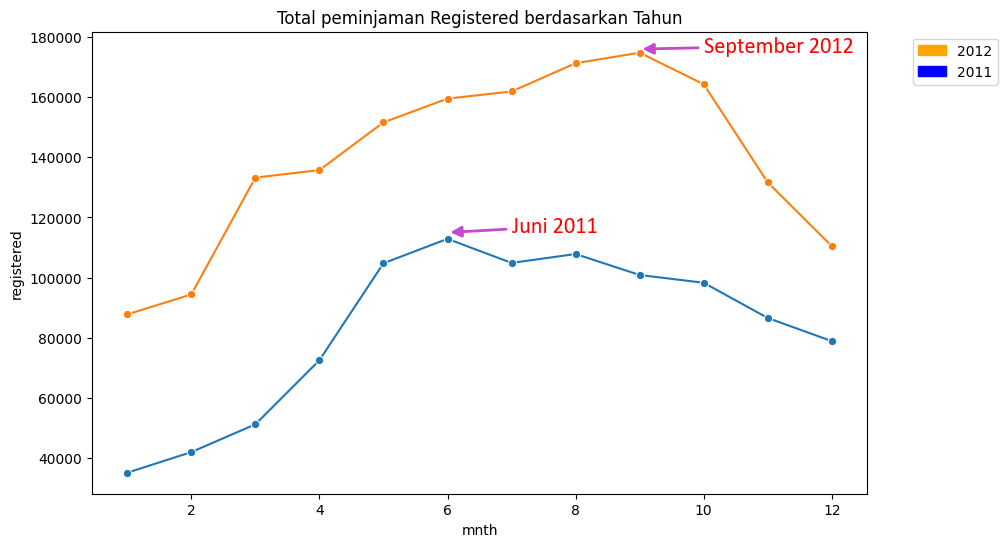

In [35]:
# viz line chart total peminjam terdaftar di berdasarkan Tahun
plt.figure(figsize=(10, 6)) 
plt.title("Total peminjaman Registered berdasarkan Tahun")
sns.lineplot(x='mnth', y='registered', data=dfg, hue='yr', marker="o") 
#max value
hfont = {'fontname':'Calibri'} # main font
ann_color = '#c449cc' # annotation color
arrowprops=dict(arrowstyle='-|>', color=ann_color, linewidth=2)
plt.annotate('September 2012', 
            xy=(9, 176000), # arrow position (x, y)
            xytext=(10, 175000), # text position (x, y)
            color='red',
            arrowprops=arrowprops,
            fontsize=16,
           **hfont)

plt.annotate('Juni 2011', 
            xy=(6, 115000), # arrow position (x, y)
            xytext=(7, 115000), # text position (x, y)
            color='red',
            arrowprops=arrowprops,
            fontsize=16,
           **hfont)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
orange_patch = mpatches.Patch(color='orange', label='2012')
blue_patch = mpatches.Patch(color='blue', label='2011')
plt.legend(handles=[orange_patch, blue_patch], loc="upper left", bbox_to_anchor=(1.05, 1))
plt.xticks() 
plt.show()

In [36]:
# RFM analysis 
# rfm_df = bike_day_df.groupby(by="mnth", as_index=False).agg({
#     "dteday": "max", # mengambil tanggal order terakhir
#     "instant": "nunique", # menghitung jumlah order
#     "cnt": "sum" # menghitung jumlah revenue yang dihasilkan
# })
# rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# # menghitung kapan terakhir pelanggan melakukan transaksi (hari)
# rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
# recent_date = orders_df["order_date"].dt.date.max()
# rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
# rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
# rfm_df.head()

############# BELUM MENEMUKAN CARA RFM ##################################


In [37]:
# export data
bike_day_df.to_csv("bike_day_df.csv", index=False)